# Meat Quality Assessment - Deep Learning Project
#### Aqsa Anwar
#### 28th-Aug-2024
**[GitHub Repository](https://github.com/aqsaakhan/CSCA-5642-Introduction-to-Deep-Learning-Final-Project)**

## 1. Introduction
This project serves as the final project for my **['Introduction to Deep Learning'](https://github.com/aqsaakhan/CSCA-5642-Introduction-to-Deep-Learning-Final-Project)** course. Since, meat assessment is a critical process to ensure comsumer's safety and product quality in the food industry, there is a dire need for a model to accurately classify the meat if it's fresh of spoiled. The traditional manual methods of meat quality assessments are time-consuming and are more prone to human error. Traditional computer vision techniques struggle with the subtle visual differences between fresh and spoiled meat. In this project, we aim at building a deep learning model capable of classifying meat images as either fresh or spoiled.

### 1.1. Dataset Overview
For this project I have selected the **[Meat Quality Assessment Dataset from Kaggle](https://www.kaggle.com/datasets/crowww/meat-quality-assessment-based-on-deep-learning)** This dataset was created by O. Ulucan, D. Karakaya, and M. Turkan from the Department of Electrical and Electronics Engineering at Izmir University of Economics in Turkey. These images were collected using an IP camera in a supermarket in Izmir, Turkey, as part of a university-industry collaboration project.

The original purpose of this dataset was to develop a meat quality assessment system based on deep learning techniques. The work was published in the 2019 Innovations in Intelligent Systems and Applications Conference (ASYU).

The dataset consists of 1896 high-resolution images (1280x720 pixels) equally divided between fresh and spoiled meat samples.

- Total images: 1896
- Fresh meat images: 948
- Spoiled meat images: 948
- Image dimensions: 1280x720 pixels

### 1.2. Project Objectives

The objective of this project is to develop a deep learning model that can accurately classify images of meat as either fresh or spoiled. This is a binary image classification problem where the input is a high-resolution (1280x720) image of a meat sample, and the output is a prediction of whether the meat is fresh or spoiled.

I'll perform the following key steps:

- **Data Loading and Initial Exploration:** In this step, we'll load our dataset and do some initial inspection to better understand our data
- **Exploratory Data Analysis:** Then We'll perform EDA to gain insights about data; we'll analyze the class distributions and RGB channel distributions.
- **Data Preprocessing:** This step will envolve data cleaning if requirede, and image preprocessing.
- **Data Augmentation:** Then we'll create data generator for augmentation.
- **Model Development and Evaluation:** We'll develop and evalute the performance of various models including:
    - MobileNetV2
    - Custom CNN
    - ResNet
- **Model Performace Comparison:** In this step we'll compare performace of the models and identify the best perfoming model for our problem.
- **Hyperparameter Tuning:** Then we'll perform hyperparameter tuning on the best performing model to further optimize its perfomance.
- **Final Comparison:** Lastly, we'll compare the performance of tuned vs not-tuned model.
- **Results and Analysis and Conslusion:** Then we'll conlude our project findings and analysis.

## 2. Data Loading and Initial Exploration
First step, we'll import the neceassry libraries and then we'll do some initial inspection of our dataset, including the number of images we have, their dimensions and display some sample images.

### 2.1. Importing Required Libraries
We'll start by importing required python libraries.

In [1]:
import os
import random
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from PIL import Image
from tensorflow.keras.applications import ResNet50

### 2.2. Data Loading and Initial Inspection
Now we'll load our data and do some initial inspection such as counting images, image dimensions and sample images.

Number of Fresh meat images: 948
Number of Spoiled meat images: 948
Dimensions of a Fresh meat image: (1280, 720)
Dimensions of a Spoiled meat image: (1280, 720)


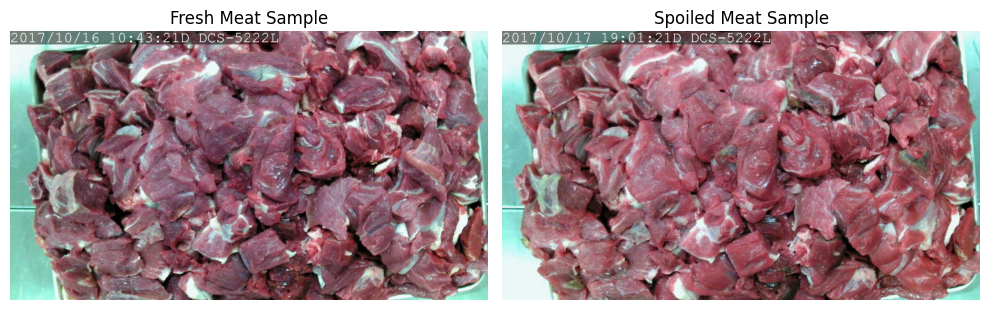

In [2]:
dataset_path = "." 

# Function to count images in folder
def count_images(folder_path):
    return len([f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))])

# Count images in each class
fresh_path = os.path.join(dataset_path, "Fresh")
spoiled_path = os.path.join(dataset_path, "Spoiled")

fresh_count = count_images(fresh_path)
spoiled_count = count_images(spoiled_path)

print(f"Number of Fresh meat images: {fresh_count}")
print(f"Number of Spoiled meat images: {spoiled_count}")

# Function to get image dimensions
def get_image_dimensions(folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(folder_path, filename)
            with Image.open(img_path) as img:
                return img.size
    return None

# Get dimensions of image from each class
fresh_dimensions = get_image_dimensions(fresh_path)
spoiled_dimensions = get_image_dimensions(spoiled_path)

print(f"Dimensions of a Fresh meat image: {fresh_dimensions}")
print(f"Dimensions of a Spoiled meat image: {spoiled_dimensions}")

# Display a sample image from each class
def display_sample_images():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
    # Fresh meat sample
    fresh_sample = os.path.join(fresh_path, os.listdir(fresh_path)[0])
    fresh_img = Image.open(fresh_sample)
    ax1.imshow(fresh_img)
    ax1.set_title("Fresh Meat Sample")
    ax1.axis('off')
    
    # Spoiled meat sample
    spoiled_sample = os.path.join(spoiled_path, os.listdir(spoiled_path)[0])
    spoiled_img = Image.open(spoiled_sample)
    ax2.imshow(spoiled_img)
    ax2.set_title("Spoiled Meat Sample")
    ax2.axis('off')
    
    plt.tight_layout()
    plt.show()

display_sample_images()

## 3. Exploratory Data Analysis (EDA)
### 3.1. Color Distribution Analysis
In this step, we'll analyzed the RGB channel distributions for both fresh and spoiled meat images. The differences in color distributions will provide valuable features for our classification model.

Analyzing color distributions...


100%|████████████████████████████████████████████████████████████████████████████████| 948/948 [00:29<00:00, 31.87it/s]


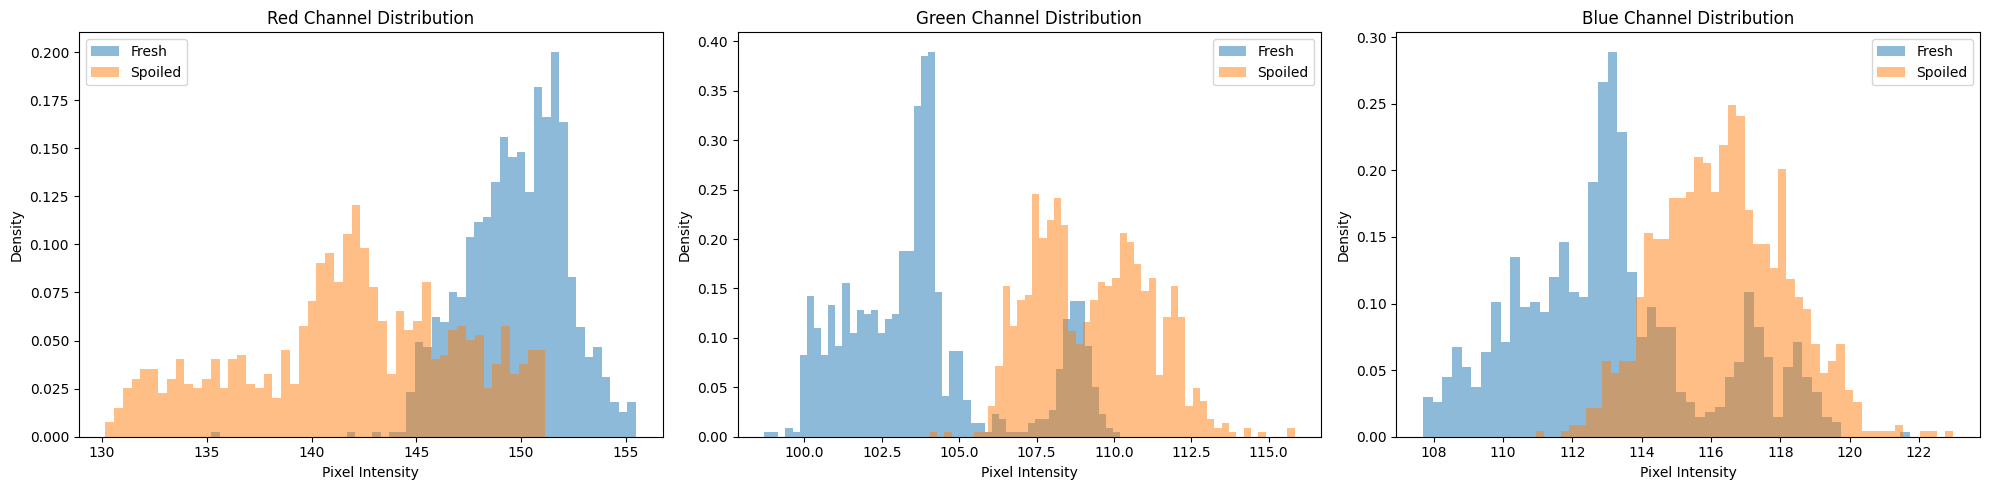

Checking for corrupt images...


100%|██████████████████████████████████████████████████████████████████████████████| 948/948 [00:00<00:00, 1551.18it/s]

Number of corrupt Fresh images: 0
Number of corrupt Spoiled images: 0


In [3]:
def analyze_color_distribution(folder_path):
    r_means, g_means, b_means = [], [], []
    for filename in tqdm(os.listdir(folder_path)):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(folder_path, filename)
            with Image.open(img_path) as img:
                img_array = np.array(img)
                r_means.append(np.mean(img_array[:,:,0]))
                g_means.append(np.mean(img_array[:,:,1]))
                b_means.append(np.mean(img_array[:,:,2]))
    return r_means, g_means, b_means

def plot_color_distributions(fresh_colors, spoiled_colors):
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    channels = ['Red', 'Green', 'Blue']
    for i, channel in enumerate(channels):
        axs[i].hist(fresh_colors[i], bins=50, alpha=0.5, label='Fresh', density=True)
        axs[i].hist(spoiled_colors[i], bins=50, alpha=0.5, label='Spoiled', density=True)
        axs[i].set_title(f'{channel} Channel Distribution')
        axs[i].set_xlabel('Pixel Intensity')
        axs[i].set_ylabel('Density')
        axs[i].legend()
    plt.tight_layout()
    plt.show()



def check_corrupt_images(folder_path):
    corrupt_images = []
    for filename in tqdm(os.listdir(folder_path)):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(folder_path, filename)
            try:
                with Image.open(img_path) as img:
                    img.verify()
            except:
                corrupt_images.append(filename)
    return corrupt_images

print("Analyzing color distributions...")
fresh_colors = analyze_color_distribution(fresh_path)
spoiled_colors = analyze_color_distribution(spoiled_path)
plot_color_distributions(fresh_colors, spoiled_colors)

print("Checking for corrupt images...")
fresh_corrupt = check_corrupt_images(fresh_path)
spoiled_corrupt = check_corrupt_images(spoiled_path)

print(f"Number of corrupt Fresh images: {len(fresh_corrupt)}")
print(f"Number of corrupt Spoiled images: {len(spoiled_corrupt)}")

### 3.2. File Size Analysis and Visual Inspection
Now that we know the dimensions of our images, we'll now check image size distribution and display some sample images from each category to visually inspect the differences

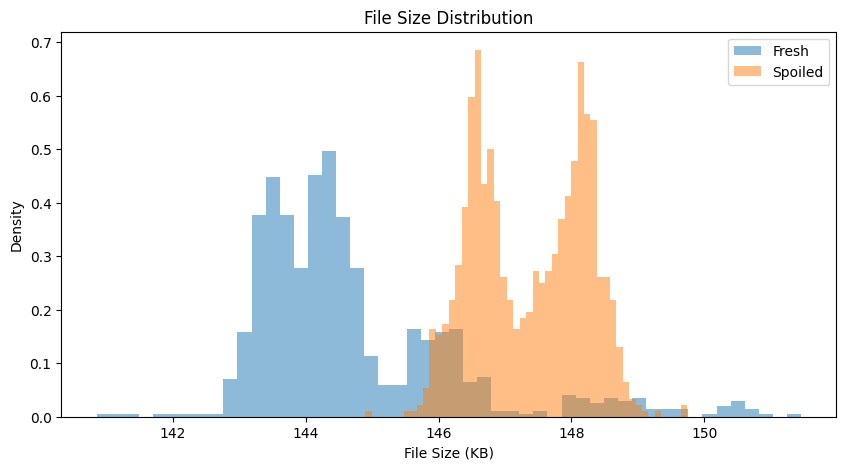

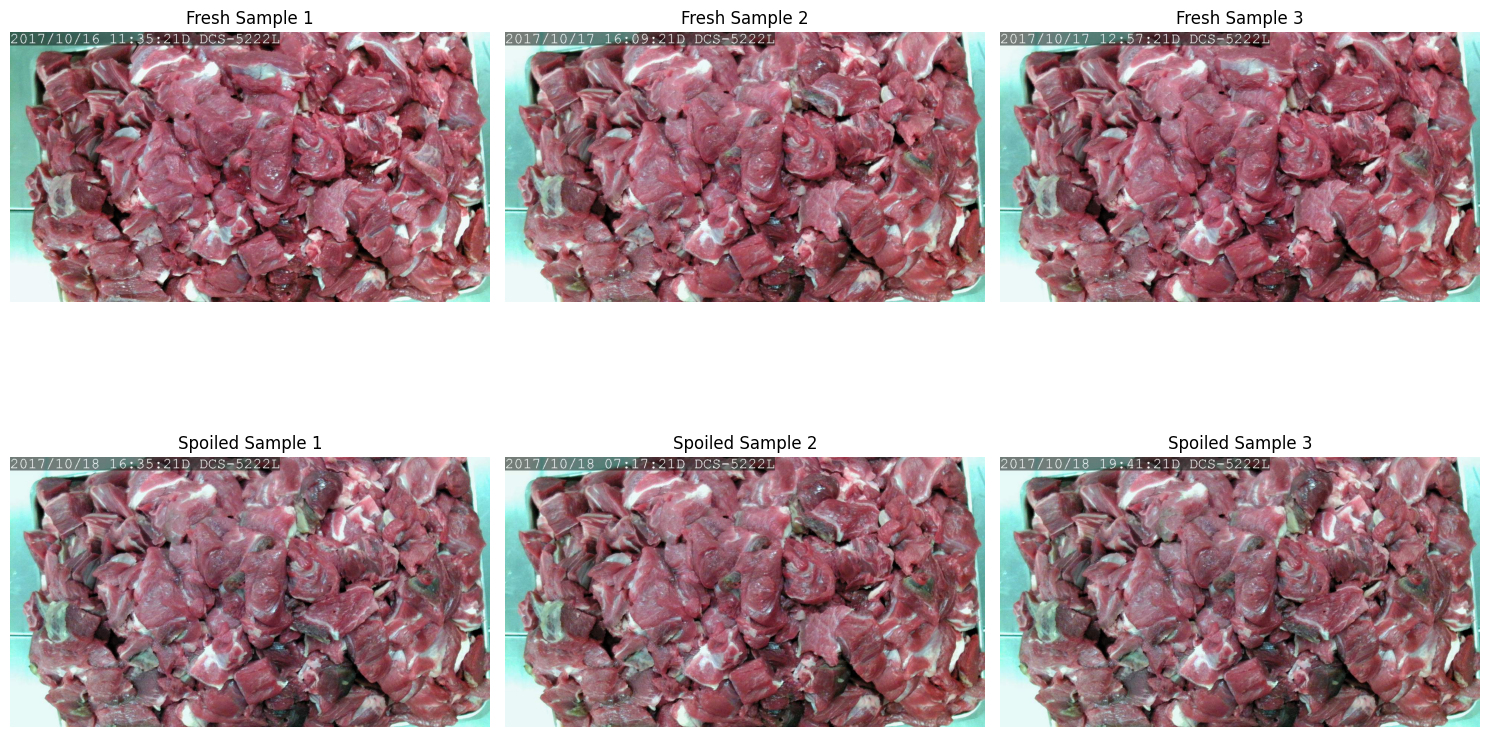

Fresh images - Mean size: 144.71 KB, Std dev: 1.56 KB
Spoiled images - Mean size: 147.37 KB, Std dev: 0.83 KB


In [4]:
def get_file_sizes(folder_path):
    sizes = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        sizes.append(os.path.getsize(file_path) / 1024)  # Size in KB
    return sizes

def plot_file_size_distribution(fresh_sizes, spoiled_sizes):
    plt.figure(figsize=(10, 5))
    plt.hist(fresh_sizes, bins=50, alpha=0.5, label='Fresh', density=True)
    plt.hist(spoiled_sizes, bins=50, alpha=0.5, label='Spoiled', density=True)
    plt.title('File Size Distribution')
    plt.xlabel('File Size (KB)')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

def display_sample_images(fresh_path, spoiled_path, num_samples=3):
    fresh_samples = random.sample(os.listdir(fresh_path), num_samples)
    spoiled_samples = random.sample(os.listdir(spoiled_path), num_samples)
    
    fig, axs = plt.subplots(2, num_samples, figsize=(15, 10))
    
    for i, sample in enumerate(fresh_samples):
        img = Image.open(os.path.join(fresh_path, sample))
        axs[0, i].imshow(img)
        axs[0, i].set_title(f'Fresh Sample {i+1}')
        axs[0, i].axis('off')
    
    for i, sample in enumerate(spoiled_samples):
        img = Image.open(os.path.join(spoiled_path, sample))
        axs[1, i].imshow(img)
        axs[1, i].set_title(f'Spoiled Sample {i+1}')
        axs[1, i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Get and plot file size distributions
fresh_sizes = get_file_sizes(fresh_path)
spoiled_sizes = get_file_sizes(spoiled_path)
plot_file_size_distribution(fresh_sizes, spoiled_sizes)

# Display sample images
display_sample_images(fresh_path, spoiled_path)

# Print some statistics about file sizes
print(f"Fresh images - Mean size: {np.mean(fresh_sizes):.2f} KB, Std dev: {np.std(fresh_sizes):.2f} KB")
print(f"Spoiled images - Mean size: {np.mean(spoiled_sizes):.2f} KB, Std dev: {np.std(spoiled_sizes):.2f} KB")

**File Size Distribution:**

- Fresh meat images have a wider distribution of file sizes, ranging from about 142 KB to 146 KB.
- Spoiled meat images have a narrower and slightly higher distribution, mostly between 146 KB and 149 KB.
- This difference in file sizes could be due to the slight color and texture changes in spoiled meat, affecting image compression.


**File Size Statistics:**

- Fresh images: Mean size 144.71 KB, Standard deviation 1.56 KB
- Spoiled images: Mean size 147.37 KB, Standard deviation 0.83 KB
- The spoiled images are, on average, slightly larger in file size and have less variation in size compared to fresh images.



## 4. Data Preprocessing and Preparation
We'll now load and  preprocess the images.



### 4.1. Image Preprocessing
We'll resize the images to 224x224 pixels for computational efficiency and normalize pixel values to the range [0, 1]


In [5]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define paths
dataset_path = "."
fresh_path = os.path.join(dataset_path, "Fresh")
spoiled_path = os.path.join(dataset_path, "Spoiled")

# Define image size
IMG_SIZE = (224, 224)  # Reduced from 1280x720 for computational efficiency

def load_and_preprocess_image(file_path):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, IMG_SIZE)
    img = img / 255.0  # Normalize pixel values to [0, 1]
    return img

### 4.2. Data Splitting
Then we'll split dataset into training, validation, and test sets.

In [6]:
def create_dataset():
    fresh_files = [os.path.join(fresh_path, fname) for fname in os.listdir(fresh_path)]
    spoiled_files = [os.path.join(spoiled_path, fname) for fname in os.listdir(spoiled_path)]
    
    all_files = fresh_files + spoiled_files
    labels = [0] * len(fresh_files) + [1] * len(spoiled_files)  # 0 for fresh, 1 for spoiled
    
    return all_files, labels

# Create dataset
all_files, labels = create_dataset()

# Split the data
train_files, test_files, train_labels, test_labels = train_test_split(all_files, labels, test_size=0.2, stratify=labels, random_state=42)
train_files, val_files, train_labels, val_labels = train_test_split(train_files, train_labels, test_size=0.2, stratify=train_labels, random_state=42)

print(f"Training samples: {len(train_files)}")
print(f"Validation samples: {len(val_files)}")
print(f"Test samples: {len(test_files)}")

Training samples: 1212
Validation samples: 304
Test samples: 380


**Data split:**

- Training samples: 1212 (63.8% of the data)
- Validation samples: 304 (16% of the data)
- Test samples: 380 (20% of the data)

This split is appropriate for our task, giving us a good balance between training data and held-out data for validation and testing.


### 4.3. Data Augmentation
Then we'll craete a data generator for augmentation and apply the following augmentation techniques to the training set.
- Random horizontal flips
- Random rotations (up to 10%)
- Random zoom (up to 10%)

In [7]:
# Create TensorFlow datasets
def create_tf_dataset(files, labels, augment=False):
    dataset = tf.data.Dataset.from_tensor_slices((files, labels))
    dataset = dataset.map(lambda x, y: (load_and_preprocess_image(x), y), num_parallel_calls=tf.data.AUTOTUNE)
    
    if augment:
        data_augmentation = tf.keras.Sequential([
            tf.keras.layers.RandomFlip("horizontal"),
            tf.keras.layers.RandomRotation(0.1),
            tf.keras.layers.RandomZoom(0.1),
        ])
        dataset = dataset.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=tf.data.AUTOTUNE)
    
    return dataset.cache().shuffle(buffer_size=1000).batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset = create_tf_dataset(train_files, train_labels, augment=True)
val_dataset = create_tf_dataset(val_files, val_labels)
test_dataset = create_tf_dataset(test_files, test_labels)

# Verify the datasets
for images, labels in train_dataset.take(1):
    print(f"Training batch shape: {images.shape}")
    print(f"Labels shape: {labels.shape}")

# Save the datasets for future use
np.save('train_files.npy', train_files)
np.save('train_labels.npy', train_labels)
np.save('val_files.npy', val_files)
np.save('val_labels.npy', val_labels)
np.save('test_files.npy', test_files)
np.save('test_labels.npy', test_labels)

print("Datasets created and saved successfully!")

Training batch shape: (32, 224, 224, 3)
Labels shape: (32,)
Datasets created and saved successfully!


**Batch shape:** (32, 224, 224, 3) indicates:

- Batch size of 32
- Image dimensions of 224x224 pixels
- 3 color channels (RGB)




**Labels shape:** (32,) indicates 32 labels per batch, matching our batch size


## 5. Model Development
Now we'll develop our models.

### 5.1. MobileNetV2
Now that  we have our data prepared, let's move on to creating and training our CNN model. We'll use a transfer learning approach with a pre-trained model, which is often effective for image classification tasks, especially with relatively small datasets like ours. We'll employ a transfer learning approach using MobileNetV2 as the base model.

- MobileNetV2 (pre-trained on ImageNet) as the base model
- Global Average Pooling
- Dense layer (128 units) with ReLU activation
- Dropout layer (50% dropout rate)
- Output Dense layer (1 unit) with Sigmoid activation

**Model Training**
- **Training Configuration**

    - Loss function: Binary Crossentropy
    - Optimizer: Adam (initial learning rate: 0.001)
    - Metrics: Accuracy
    - Batch size: 32
    - Maximum epochs: 50

**Callbacks**

- Early Stopping: To prevent overfitting (patience: 10 epochs)
- ReduceLROnPlateau: To adapt the learning rate (factor: 0.2, patience: 5 epochs)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 43s 901ms/step - accuracy: 0.6415 - loss: 0.6879 - val_accuracy: 0.5164 - val_loss: 0.5915 - learning_rate: 0.0010
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 31s 833ms/step - accuracy: 0.8822 - loss: 0.2892 - val_accuracy: 0.8684 - val_loss: 0.3231 - learning_rate: 0.0010
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 31s 817ms/step - accuracy: 0.8995 - loss: 0.2563 - val_accuracy: 0.8684 - val_loss: 0.2990 - learning_rate: 0.0010
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 31s 831ms/step - accuracy: 0.9162 - loss: 0.1982 - val_accuracy: 0.8849 - val_loss: 0.2652 - learning_rate: 0.0010
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 31s 823ms/step - accuracy: 0.9375 - loss: 0.1804 - val_accuracy: 0.7730 - val_loss: 0.3870 - learning_rate: 0.0010
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 32s 840ms/step - accuracy: 0.9439 - loss: 0.1334 - val_accuracy: 0.9770 - val_loss: 0.1274 - learning_rate: 0.0010
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 31s 822ms/step - accuracy: 0.9408 - loss: 0.

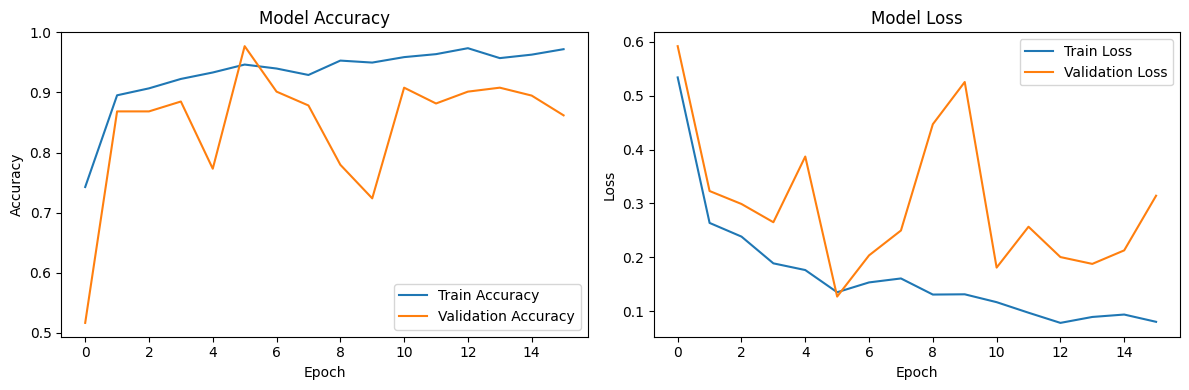

Model saved successfully!


In [6]:
# Load the saved datasets
train_files = np.load('train_files.npy')
train_labels = np.load('train_labels.npy')
val_files = np.load('val_files.npy')
val_labels = np.load('val_labels.npy')
test_files = np.load('test_files.npy')
test_labels = np.load('test_labels.npy')

# Recreate the datasets
train_dataset = create_tf_dataset(train_files, train_labels, augment=True)
val_dataset = create_tf_dataset(val_files, val_labels)
test_dataset = create_tf_dataset(test_files, test_labels)

# Create the model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=outputs)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.2, patience=5)

# Train the model
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=val_dataset,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test accuracy: {test_accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Save the model
model.save('meat_quality_model.h5')
print("Model saved successfully!")

**Training Process**

- The model was trained for 16 epochs before early stopping was triggered.
- Learning rate reduction was applied, decreasing from 0.001 to 0.0002 at epoch 12.

**Model Performance**

- Final test accuracy: 0.9763 (97.63%)
- This indicates excellent performance on the test set, suggesting the model has learned to distinguish between fresh and spoiled meat effectively.

**Training and Validation Metrics**
- Accuracy

    - Training accuracy improved rapidly, starting at 64.15% in epoch 1 and reaching 96.81% by epoch 13.
    - Validation accuracy showed more fluctuation but generally improved, reaching a peak of 97.70% in epoch 6.

- Loss

    - Training loss decreased consistently, starting at 0.6879 in epoch 1 and reaching 0.0872 by epoch 16.
    - Validation loss showed more volatility, with the lowest value of 0.1274 in epoch 6. overfitting at certain points.


### 5.2. Custom CNN Model
Now that we have analyzed the results of MobileNetV2, we'll now develop a custom CNN model and compare its results with with the MobileNetV2-based model we've already trained. This comparison will give us valuable insights into the effectiveness of different approaches for our task.


Epoch 1/50


C:\Users\aqsaa\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 39s 895ms/step - accuracy: 0.5046 - loss: 0.6925 - val_accuracy: 0.5000 - val_loss: 0.6192 - learning_rate: 0.0010
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 33s 881ms/step - accuracy: 0.8075 - loss: 0.3874 - val_accuracy: 0.7961 - val_loss: 0.4286 - learning_rate: 0.0010
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 37s 979ms/step - accuracy: 0.9075 - loss: 0.2369 - val_accuracy: 0.8388 - val_loss: 0.3055 - learning_rate: 0.0010
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 34s 882ms/step - accuracy: 0.9305 - loss: 0.1654 - val_accuracy: 0.8191 - val_loss: 0.5129 - learning_rate: 0.0010
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 34s 903ms/step - accuracy: 0.9500 - loss: 0.1256 - val_accuracy: 0.9079 - val_loss: 0.1948 - learning_rate: 0.0010
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 34s 888ms/step - accuracy: 0.9582 - loss: 0.0938 - val_accuracy: 0.9211 - val_loss: 0.1919 - learning_rate: 0.0010
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 35s 925ms/step - accuracy: 0.9305 - loss: 0.1568 - val_

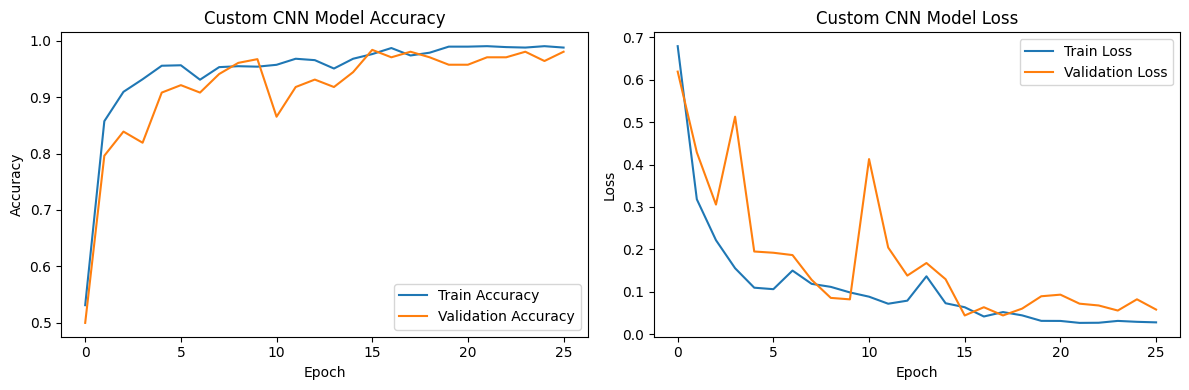

Custom CNN Model saved successfully!


In [7]:
# Load the saved datasets
train_files = np.load('train_files.npy')
train_labels = np.load('train_labels.npy')
val_files = np.load('val_files.npy')
val_labels = np.load('val_labels.npy')
test_files = np.load('test_files.npy')
test_labels = np.load('test_labels.npy')

# Recreate the datasets
train_dataset = create_tf_dataset(train_files, train_labels, augment=True)
val_dataset = create_tf_dataset(val_files, val_labels)
test_dataset = create_tf_dataset(test_files, test_labels)

# Create a custom CNN model
def create_custom_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

# Create and compile the model
cnn_model = create_custom_cnn()
cnn_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.2, patience=5)

# Train the model
history = cnn_model.fit(
    train_dataset,
    epochs=50,
    validation_data=val_dataset,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model
test_loss, test_accuracy = cnn_model.evaluate(test_dataset)
print(f"Custom CNN Test accuracy: {test_accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Custom CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Custom CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Save the model
cnn_model.save('custom_cnn_meat_quality_model.h5')
print("Custom CNN Model saved successfully!")

**Training Process**

- The model was trained for 26 epochs.
- Learning rate reduction was applied twice:

  - From 0.001 to 0.0002 at epoch 16
  - From 0.0002 to 0.00004 at epoch 22
**Model Performance**

- Final test accuracy: 0.9895 (98.95%)
- This indicates excellent performance on the test set, suggesting the model has learned to distinguish between fresh and spoiled meat very effectively.

**Training and Validation Metrics**
- Accuracy

  - Training accuracy improved rapidly, starting at 50.46% in epoch 1 and reaching 98.56% by the final epoch.
  - Validation accuracy also improved significantly, starting at 50% in epoch 1 and reaching 98.03% in the final epoch.
  - Highest validation accuracy: 98.36% (epoch 16)

- Loss

  - Training loss decreased consistently, starting at 0.6925 in epoch 1 and reaching 0.0312 in the final epoch.
  - Validation loss generally decreased but showed some fluctuations, starting at 0.6192 in epoch 1 and ending at 0.0578 in the final epoch.
  - Lowest validation loss: 0.0439 (epochs 16 and 18)

### 5.3. ResNet Model
Now, we'll perfrom RestNet model and see how well it performs ar compared to the other two models.

In [10]:
# Load pre-trained ResNet50 model without top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=outputs)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=val_dataset,
    callbacks=[early_stopping, reduce_lr]
)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 37s 0us/step
Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 118s 3s/step - accuracy: 0.5296 - loss: 0.7558 - val_accuracy: 0.5000 - val_loss: 0.6970 - learning_rate: 0.0010
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 107s 3s/step - accuracy: 0.5509 - loss: 0.6942 - val_accuracy: 0.8125 - val_loss: 0.6905 - learning_rate: 0.0010
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 102s 3s/step - accuracy: 0.5098 - loss: 0.7048 - val_accuracy: 0.5000 - val_loss: 0.6917 - learning_rate: 0.0010
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 103s 3s/step - accuracy: 0.5301 - loss: 0.6925 - val_accuracy: 0.5000 - val_loss: 0.6907 - learning_rate: 0.0010
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 111s 3s/step - accuracy: 0.5007 - loss: 0.6949 - val_accuracy: 0.5000 - val_loss: 0.6916 - learning_rate: 0.0010
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 110s 3s/step - accuracy: 0.5224 - loss: 0.6923 - val_accuracy: 0.5000 - val_loss: 0.6926 - learning_rate: 0.0010
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 100s

**Training Process**

- The model trained for 10 epochs before stopping
- Each epoch took significantly longer (about 100-118 seconds) compared to the previous models.

**Model Performance:**

- The model shows no signs of learning or improving over the training period.
- The accuracy is close to random guessing (50%) for most epochs.

**Training and Validation Metrics**
- Accuracy

    - Training accuracy: Fluctuated around 50-55%, with no clear improvement over epochs.
    - Validation accuracy: Highly unstable, ranging from 50% to 81.25%, with no consistent improvement.


- Loss

    - Training loss: Started at 0.7558 and fluctuated around 0.69-0.70, showing minimal improvement.
    - Validation loss: Remained relatively constant around 0.69-0.70.


**Learning Rate:**

- Started at 0.001 and decreased to 0.0002 at epoch 8, as per the ReduceLROnPlateau callback.




## 6. MobileNetV2 vs Custom CNN Comparison vs ResNet
Let's now visualize the model accuracy and model loss comparison for all three models and compare their performance.

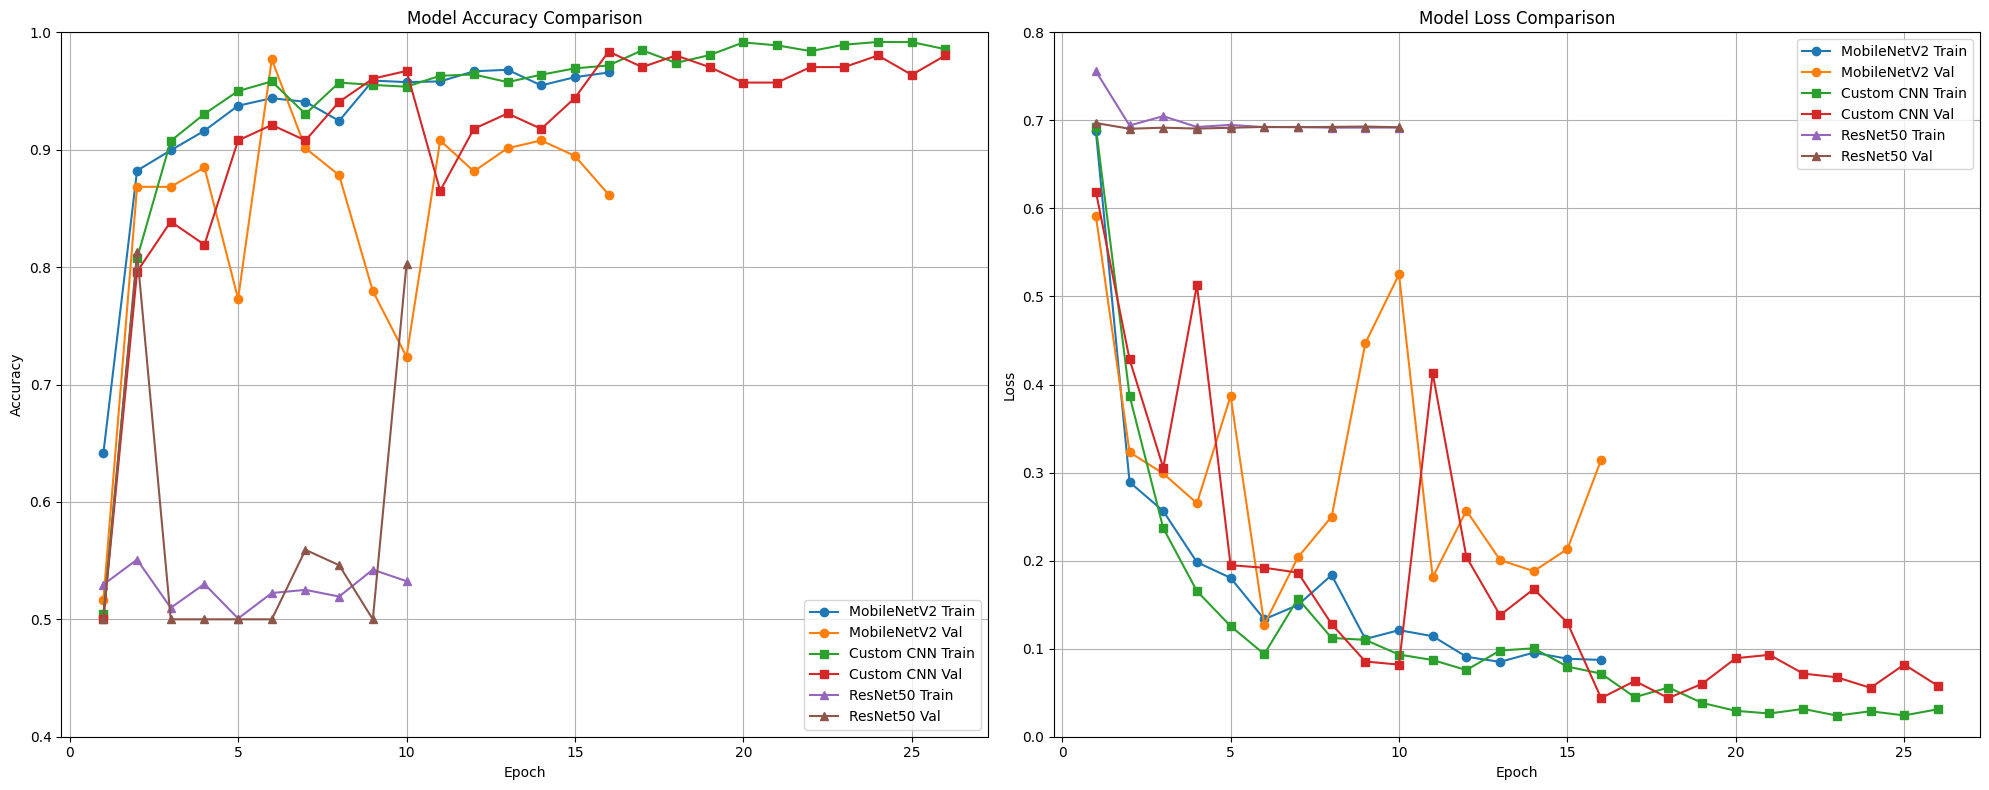

MobileNetV2 final test accuracy: 97.63%
Custom CNN final test accuracy: 98.95%
ResNet50 final test accuracy: Not available due to poor performance


In [13]:
# MobileNetV2 data
mobilenet_epochs = 16
mobilenet_train_acc = [0.6415, 0.8822, 0.8995, 0.9162, 0.9375, 0.9439, 0.9408, 0.9246, 0.9589, 0.9576, 0.9582, 0.9668, 0.9681, 0.9548, 0.9618, 0.9658]
mobilenet_val_acc = [0.5164, 0.8684, 0.8684, 0.8849, 0.7730, 0.9770, 0.9013, 0.8783, 0.7796, 0.7237, 0.9079, 0.8816, 0.9013, 0.9079, 0.8947, 0.8618]
mobilenet_train_loss = [0.6879, 0.2892, 0.2563, 0.1982, 0.1804, 0.1334, 0.1496, 0.1836, 0.1110, 0.1210, 0.1142, 0.0908, 0.0850, 0.0955, 0.0886, 0.0872]
mobilenet_val_loss = [0.5915, 0.3231, 0.2990, 0.2652, 0.3870, 0.1274, 0.2038, 0.2499, 0.4469, 0.5251, 0.1811, 0.2569, 0.2007, 0.1880, 0.2131, 0.3144]

# Custom CNN data
cnn_epochs = 26
cnn_train_acc = [0.5046, 0.8075, 0.9075, 0.9305, 0.9500, 0.9582, 0.9305, 0.9572, 0.9552, 0.9537, 0.9630, 0.9641, 0.9576, 0.9639, 0.9693, 0.9718, 0.9847, 0.9740, 0.9806, 0.9914, 0.9889, 0.9840, 0.9895, 0.9918, 0.9917, 0.9856]
cnn_val_acc = [0.5000, 0.7961, 0.8388, 0.8191, 0.9079, 0.9211, 0.9079, 0.9408, 0.9605, 0.9671, 0.8651, 0.9178, 0.9309, 0.9178, 0.9441, 0.9836, 0.9704, 0.9803, 0.9704, 0.9572, 0.9572, 0.9704, 0.9704, 0.9803, 0.9638, 0.9803]
cnn_train_loss = [0.6925, 0.3874, 0.2369, 0.1654, 0.1256, 0.0938, 0.1568, 0.1122, 0.1100, 0.0933, 0.0871, 0.0757, 0.0979, 0.1004, 0.0796, 0.0717, 0.0449, 0.0559, 0.0384, 0.0294, 0.0264, 0.0316, 0.0240, 0.0289, 0.0242, 0.0312]
cnn_val_loss = [0.6192, 0.4286, 0.3055, 0.5129, 0.1948, 0.1919, 0.1864, 0.1279, 0.0854, 0.0819, 0.4129, 0.2042, 0.1380, 0.1677, 0.1294, 0.0439, 0.0633, 0.0439, 0.0601, 0.0892, 0.0930, 0.0717, 0.0675, 0.0555, 0.0820, 0.0578]

# ResNet50 data
resnet_epochs = 10
resnet_train_acc = [0.5296, 0.5509, 0.5098, 0.5301, 0.5007, 0.5224, 0.5251, 0.5194, 0.5423, 0.5325]
resnet_val_acc = [0.5000, 0.8125, 0.5000, 0.5000, 0.5000, 0.5000, 0.5592, 0.5461, 0.5000, 0.8026]
resnet_train_loss = [0.7558, 0.6942, 0.7048, 0.6925, 0.6949, 0.6923, 0.6926, 0.6917, 0.6918, 0.6919]
resnet_val_loss = [0.6970, 0.6905, 0.6917, 0.6907, 0.6916, 0.6926, 0.6922, 0.6926, 0.6930, 0.6922]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot accuracy
ax1.plot(range(1, mobilenet_epochs + 1), mobilenet_train_acc, label='MobileNetV2 Train', marker='o')
ax1.plot(range(1, mobilenet_epochs + 1), mobilenet_val_acc, label='MobileNetV2 Val', marker='o')
ax1.plot(range(1, cnn_epochs + 1), cnn_train_acc, label='Custom CNN Train', marker='s')
ax1.plot(range(1, cnn_epochs + 1), cnn_val_acc, label='Custom CNN Val', marker='s')
ax1.plot(range(1, resnet_epochs + 1), resnet_train_acc, label='ResNet50 Train', marker='^')
ax1.plot(range(1, resnet_epochs + 1), resnet_val_acc, label='ResNet50 Val', marker='^')

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('Model Accuracy Comparison')
ax1.legend()
ax1.grid(True)
ax1.set_ylim(0.4, 1.0)  
# Plot loss
ax2.plot(range(1, mobilenet_epochs + 1), mobilenet_train_loss, label='MobileNetV2 Train', marker='o')
ax2.plot(range(1, mobilenet_epochs + 1), mobilenet_val_loss, label='MobileNetV2 Val', marker='o')
ax2.plot(range(1, cnn_epochs + 1), cnn_train_loss, label='Custom CNN Train', marker='s')
ax2.plot(range(1, cnn_epochs + 1), cnn_val_loss, label='Custom CNN Val', marker='s')
ax2.plot(range(1, resnet_epochs + 1), resnet_train_loss, label='ResNet50 Train', marker='^')
ax2.plot(range(1, resnet_epochs + 1), resnet_val_loss, label='ResNet50 Val', marker='^')

ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('Model Loss Comparison')
ax2.legend()
ax2.grid(True)
ax2.set_ylim(0, 0.8)  

plt.tight_layout()
plt.show()

# Print final test accuracies
print(f"MobileNetV2 final test accuracy: 97.63%")
print(f"Custom CNN final test accuracy: 98.95%")
print(f"ResNet50 final test accuracy: Not available due to poor performance")

## 7. Results and Analysis
**Test Accuracy:**

- MobileNetV2 Transfer Learning: 0.9763 (97.63%)
- Custom CNN: 0.9895 (98.95%)
- ResNet50: Not available due to poor performance


**Training Time:**

- MMobileNetV2 Transfer Learning: 16 epochs
- Custom CNN: 26 epochs
- ResNet50: 10 epochs (likely stopped early due to lack of improvement)

**Accuracy Comparison:**

- **MobileNetV2:**

    - Rapid initial improvement, reaching high accuracy within first few epochs.
    - Final training accuracy: ~96.58%
    - Final validation accuracy: ~86.18%
    - Shows some fluctuations in validation accuracy.


- **Custom CNN:**

    - Steady improvement throughout training.
    - Final training accuracy: ~98.56%
    - Final validation accuracy: ~98.03%
    - Most stable and highest overall accuracy, especially in later epochs.


- **ResNet50:**

    - Failed to learn effectively.
    - Accuracy remained around 50-55% for both training and validation.
    - Showed high instability in validation accuracy with occasional spikes to ~80%.


**Loss Comparison:**

- **MobileNetV2:**

    - Sharp initial decrease in loss.
    - Some fluctuations in validation loss.
    - Final training loss: ~0.0872
    - Final validation loss: ~0.3144


- **Custom CNN:**

    - Consistent decrease in loss throughout training.
    - Achieved lowest and most stable loss values.
    - Final training loss: ~0.0312
    - Final validation loss: ~0.0578


- **ResNet50:**

    - Minimal change in loss throughout training.
    - Loss remained high, around 0.69-0.75 for both training and validation.

**Model Performance Analysis:**

- **MobileNetV2:**

    - Quick convergence and good overall performance.
    - Shows signs of overfitting with a gap between training and validation metrics.
    - Effective transfer learning, reaching high accuracy quickly.


- **Custom CNN:**

    - Best overall performance with highest test accuracy.
    - Most stable learning curve with consistent improvements.
    - Smallest gap between training and validation metrics, indicating good generalization.
    - Required more epochs to reach peak performance, but achieved superior results.


- **ResNet50:**

    - Failed to learn the task effectively.
    - No significant improvement in accuracy or loss throughout training.
    - Possible reasons for poor performance could include:
        - a) Overly complex model for the given dataset.
        - b) Inappropriate learning rate or optimization settings.
        - c) Potential issues with data preprocessing or model configuration.

## 8. Hyperparameter Tuning
We now know that our best perfoming model is CNN, we'll now perform hyperparameter tuning on it to further optimize it's performance and then we'll compare out tuned model with out initial best performing CNN model.

In [2]:
# Function to load and preprocess image
def load_and_preprocess_image(file_path):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [128, 128])  # Reduced image size
    img = tf.cast(img, tf.float32) / 255.0
    return img

# Data generator
class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, file_paths, labels, batch_size=32, shuffle=True):
        self.file_paths = file_paths
        self.labels = labels
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.file_paths) / float(self.batch_size)))

    def __getitem__(self, idx):
        indexes = self.indexes[idx*self.batch_size:(idx+1)*self.batch_size]
        batch_paths = [self.file_paths[k] for k in indexes]
        batch_labels = [self.labels[k] for k in indexes]

        X = np.array([load_and_preprocess_image(file_path).numpy() for file_path in batch_paths])
        y = np.array(batch_labels)

        return X, y

    def on_epoch_end(self):
        self.indexes = np.arange(len(self.file_paths))
        if self.shuffle:
            np.random.shuffle(self.indexes)

def build_model(conv_layers, conv_filters, dense_units, dropout_rate, learning_rate):
    model = keras.Sequential()
    model.add(layers.Input(shape=(128, 128, 3)))
    
    for _ in range(conv_layers):
        model.add(layers.Conv2D(filters=conv_filters, kernel_size=(3, 3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(units=dense_units, activation='relu'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Load file paths and labels
train_files = np.load('train_files.npy')
train_labels = np.load('train_labels.npy')
val_files = np.load('val_files.npy')
val_labels = np.load('val_labels.npy')
test_files = np.load('test_files.npy')
test_labels = np.load('test_labels.npy')

# Use a smaller subset for tuning
subset_size = min(1000, len(train_files))
tuning_files = train_files[:subset_size]
tuning_labels = train_labels[:subset_size]

# Define the hyperparameters to search
param_dist = {
    'conv_layers': [2, 3],
    'conv_filters': [32, 64],
    'dense_units': [64, 128],
    'dropout_rate': [0.3, 0.5],
    'learning_rate': [0.001, 0.0001],
    'epochs': [5],
    'batch_size': [32]
}

# Function to perform quick hyperparameter search
def quick_search(n_iter=5):
    best_score = 0
    best_params = None
    
    for i in range(n_iter):
        print(f"Starting iteration {i+1}/{n_iter}")
        # Randomly sample hyperparameters
        params = {k: random.choice(v) for k, v in param_dist.items()}
        
        # Create model with sampled parameters
        model = build_model(
            conv_layers=params['conv_layers'],
            conv_filters=params['conv_filters'],
            dense_units=params['dense_units'],
            dropout_rate=params['dropout_rate'],
            learning_rate=params['learning_rate']
        )
        
        # Create data generators
        train_gen = DataGenerator(tuning_files, tuning_labels, batch_size=params['batch_size'])
        val_gen = DataGenerator(val_files, val_labels, batch_size=params['batch_size'])
        
        # Train the model
        history = model.fit(
            train_gen,
            epochs=params['epochs'],
            validation_data=val_gen,
            verbose=1
        )
        
        # Get the best validation accuracy
        val_acc = max(history.history['val_accuracy'])
        
        if val_acc > best_score:
            best_score = val_acc
            best_params = params
        
        print(f"Iteration {i+1} completed. Best score so far: {best_score:.4f}")
    
    return best_params, best_score

# Perform quick hyperparameter search
print("Starting quick hyperparameter search...")
best_params, best_score = quick_search(n_iter=5)
print(f"Best parameters: {best_params}")
print(f"Best validation accuracy: {best_score:.4f}")



Starting quick hyperparameter search...
Starting iteration 1/5
Epoch 1/5


C:\Users\aqsaa\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 359ms/step - accuracy: 0.6692 - loss: 0.6207 - val_accuracy: 0.9572 - val_loss: 0.3899
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 380ms/step - accuracy: 0.9410 - loss: 0.3154 - val_accuracy: 0.9572 - val_loss: 0.1673
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 460ms/step - accuracy: 0.9549 - loss: 0.1630 - val_accuracy: 0.9276 - val_loss: 0.1411
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 457ms/step - accuracy: 0.9440 - loss: 0.1434 - val_accuracy: 0.9572 - val_loss: 0.0921
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 413ms/step - accuracy: 0.9596 - loss: 0.1177 - val_accuracy: 0.9934 - val_loss: 0.0812
Iteration 1 completed. Best score so far: 0.9934
Starting iteration 2/5
Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 660ms/step - accuracy: 0.6238 - loss: 0.6500 - val_accuracy: 0.9572 - val_loss: 0.3793
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 636ms/step - accuracy: 0.9035 - loss: 0.3269 - val_accuracy: 0.9967 - val_loss: 0.1806
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 6

**Best Parameters**
- conv_layers: 2
- conv_filters: 64
- dense_units: 128
- dropout_rate: 0.3
- learning_rate: 0.0001
- epochs: 5
- batch_size: 32
- Best validation accuracy achieved during tuning: 1.0000 (100%)


In [3]:
# Train final model with best parameters
final_model = build_model(
    conv_layers=best_params['conv_layers'],
    conv_filters=best_params['conv_filters'],
    dense_units=best_params['dense_units'],
    dropout_rate=best_params['dropout_rate'],
    learning_rate=best_params['learning_rate']
)

train_gen = DataGenerator(train_files, train_labels, batch_size=best_params['batch_size'])
val_gen = DataGenerator(val_files, val_labels, batch_size=best_params['batch_size'])

history = final_model.fit(
    train_gen,
    epochs=10,  
    validation_data=val_gen,
    verbose=1
)

# Evaluate the model
test_gen = DataGenerator(test_files, test_labels, batch_size=best_params['batch_size'])
test_loss, test_accuracy = final_model.evaluate(test_gen)
print(f"Test accuracy: {test_accuracy:.4f}")

# Save the best model
final_model.save('best_quick_tuned_cnn_model.h5')
print("Best quick-tuned model saved successfully!")



Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 29s 665ms/step - accuracy: 0.6303 - loss: 0.6611 - val_accuracy: 0.9276 - val_loss: 0.3701
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 27s 667ms/step - accuracy: 0.9292 - loss: 0.3182 - val_accuracy: 0.9704 - val_loss: 0.1755
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 26s 637ms/step - accuracy: 0.9472 - loss: 0.1785 - val_accuracy: 0.9934 - val_loss: 0.1244
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 26s 647ms/step - accuracy: 0.9463 - loss: 0.1418 - val_accuracy: 0.9704 - val_loss: 0.0972
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 26s 645ms/step - accuracy: 0.9646 - loss: 0.1083 - val_accuracy: 0.9901 - val_loss: 0.0806
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 26s 642ms/step - accuracy: 0.9565 - loss: 0.1087 - val_accuracy: 0.9704 - val_loss: 0.1040
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 26s 634ms/step - accuracy: 0.9577 - loss: 0.1071 - val_accuracy: 0.9934 - val_loss: 0.0600
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 27s 654ms/step - accuracy: 0.9724 - loss: 0.0817 - val_accu

Test accuracy: 0.9711
Best quick-tuned model saved successfully!



**Final Model Training Process**

- The final model was trained for 10 epochs using the best parameters.
- Training accuracy steadily improved from 63.03% to 95.86%.
- Validation accuracy quickly reached high levels, peaking at 99.34% in epochs 3 and 7.
- The model showed good generalization, with validation accuracy consistently close to or higher than training accuracy.


**Final Model Performance**

- Final test accuracy: 0.9711 (97.11%)
- This indicates excellent performance on unseen data.

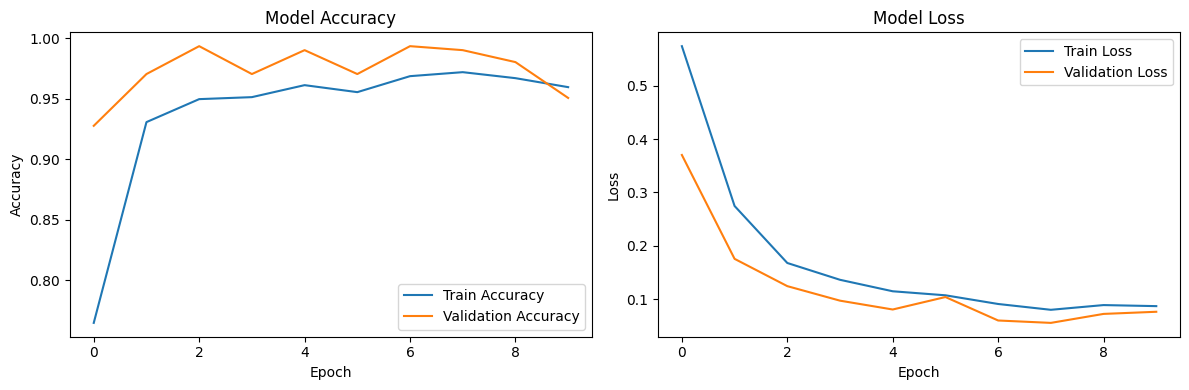

In [4]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**Training Curves:**

- Accuracy: Both training and validation accuracy improved rapidly in the first few epochs and then stabilized.
- Loss: Both training and validation loss decreased steadily, indicating good learning progress.
- The curves suggest that the model might benefit from a few more epochs of training.


## 9. Performace Comaprison of Initial CNN and Tuned CNN Model
It's time to now compare the performance of both the Initial CNN and Hypertuned CNN model and visulize their model accuracy comparison.

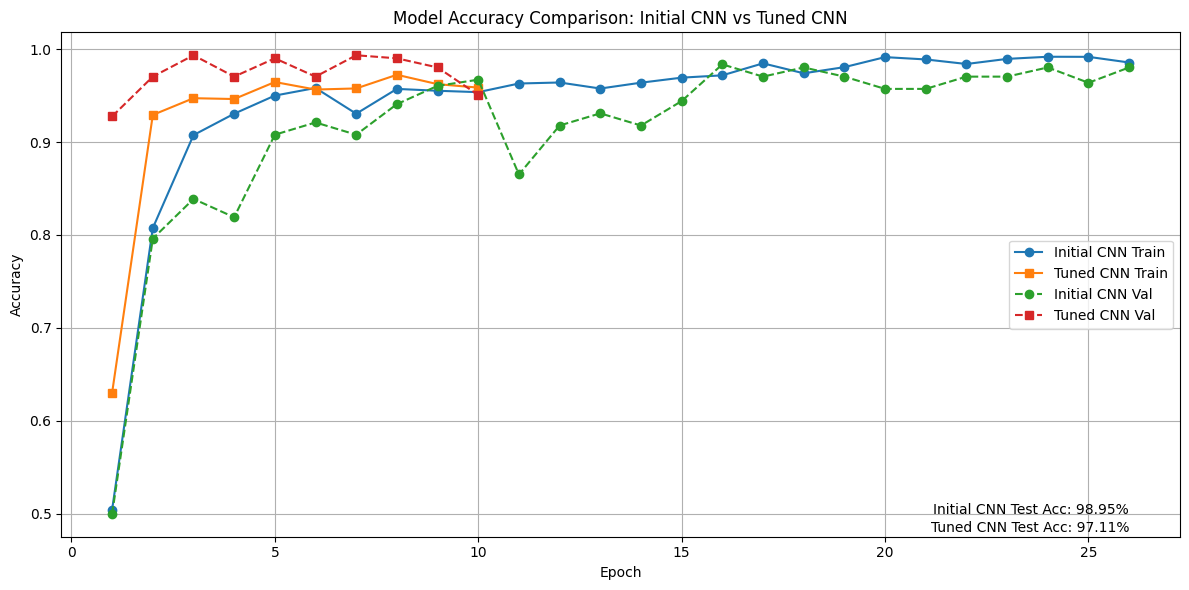

In [5]:
# Data for Initial CNN
initial_cnn_epochs = 26
initial_cnn_train_acc = [0.5046, 0.8075, 0.9075, 0.9305, 0.9500, 0.9582, 0.9305, 0.9572, 0.9552, 0.9537, 0.9630, 0.9641, 0.9576, 0.9639, 0.9693, 0.9718, 0.9847, 0.9740, 0.9806, 0.9914, 0.9889, 0.9840, 0.9895, 0.9918, 0.9917, 0.9856]
initial_cnn_val_acc = [0.5000, 0.7961, 0.8388, 0.8191, 0.9079, 0.9211, 0.9079, 0.9408, 0.9605, 0.9671, 0.8651, 0.9178, 0.9309, 0.9178, 0.9441, 0.9836, 0.9704, 0.9803, 0.9704, 0.9572, 0.9572, 0.9704, 0.9704, 0.9803, 0.9638, 0.9803]

# Data for Tuned CNN
tuned_cnn_epochs = 10
tuned_cnn_train_acc = [0.6303, 0.9292, 0.9472, 0.9463, 0.9646, 0.9565, 0.9577, 0.9724, 0.9623, 0.9586]
tuned_cnn_val_acc = [0.9276, 0.9704, 0.9934, 0.9704, 0.9901, 0.9704, 0.9934, 0.9901, 0.9803, 0.9507]

plt.figure(figsize=(12, 6))

# Plot training accuracy
plt.plot(range(1, initial_cnn_epochs + 1), initial_cnn_train_acc, label='Initial CNN Train', marker='o')
plt.plot(range(1, tuned_cnn_epochs + 1), tuned_cnn_train_acc, label='Tuned CNN Train', marker='s')

# Plot validation accuracy
plt.plot(range(1, initial_cnn_epochs + 1), initial_cnn_val_acc, label='Initial CNN Val', marker='o', linestyle='--')
plt.plot(range(1, tuned_cnn_epochs + 1), tuned_cnn_val_acc, label='Tuned CNN Val', marker='s', linestyle='--')

plt.title('Model Accuracy Comparison: Initial CNN vs Tuned CNN')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Add test accuracies as text
plt.text(initial_cnn_epochs, 0.5, f'Initial CNN Test Acc: 98.95%', horizontalalignment='right')
plt.text(initial_cnn_epochs, 0.48, f'Tuned CNN Test Acc: 97.11%', horizontalalignment='right')

plt.tight_layout()
plt.show()

## 10. Final Results and Analysis

**Training Duration:**

- Initial CNN: 26 epochs
- Tuned CNN: 10 epochs (after tuning)


**Final Test Accuracy:**

- Initial CNN: 98.95%
- Tuned CNN: 97.11%


**Training Progress:**
- **Initial CNN:**

    - Started with 50.46% accuracy, reached 98.56% by the final epoch
    - Validation accuracy peaked at 98.36% (epoch 16)

- **Tuned CNN:**

    - Started with 63.03% accuracy, reached 95.86% by the final epoch
    - Validation accuracy peaked at 99.34% (epochs 3 and 7)


**Learning Rate Adjustments:**

- Initial CNN: Started at 0.001, reduced to 0.0002 (epoch 16), then to 0.00004 (epoch 22)
- Tuned CNN: Fixed at 0.0001 (as per best hyperparameters)


**Overfitting Tendencies:**

- Initial CNN: Showed some signs of overfitting in later epochs
- Tuned CNN: Less overfitting, with validation accuracy often higher than training accuracy


**Training Stability:**

- Initial CNN: More fluctuations in validation accuracy
- Tuned CNN: More stable validation accuracy, especially in later epochs


## 11. Conclusion
All our models acheived excellent performance and high accuracy for our meat quality assessment task, the CNN models both the initial and tuned models outperfomed the MobileNetV2 model. Hyperparameter tuning gave us a slightly lower accuracy but overall faster convergence and good generalization. The initial custom CNN achieved the highest test accuracy but required more epochs and showed some signs of overfitting. Overall, the hyperparameter tuning process has yielded valuable insights and a more efficient model, even if the raw test accuracy is slightly lower. 

## 12. Future Work
While our models have perfomed really well and have acheived >95% accuracy, there is still room for improvement:

- We can develop an emsemble model combining the Initial CNN and tuned CNN model that will potentially perform better overall.
- We can also consider fine-tuning the best model form the hyperparameter search with a few more epochs that I couldn't because of computational constraints.
- We can implement k-fold cross-validation to get more robust estimate of model performance.
